<a href="https://colab.research.google.com/github/PingAnSteven/Thesis_demand_forecasting/blob/main/TimeSeries_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Dataset_BF_2015.csv to Dataset_BF_2015.csv


In [ ]:
uploaded_1 = files.upload()

Saving Dataset_BF_2016.csv to Dataset_BF_2016.csv


In [ ]:
uploaded_2 = files.upload()

Saving Dataset_BF_2017.csv to Dataset_BF_2017.csv


In [ ]:
import pandas as pd 
import io 

data = pd.read_csv(io.StringIO(uploaded['Dataset_BF_2015.csv'].decode('utf-8')),sep=',')
#data=data.drop(data.columns[4],axis=1)
data.head()

,Dte,number_clients,Shift,day,Holiday,Before holiday,Unnamed: 6
0,09/01/2015,23,2,fri,NaN,NaN,NaN
1,10/01/2015,41,2,sat,NaN,NaN,NaN
2,13/01/2015,17,1,tue,NaN,NaN,NaN
3,13/01/2015,26,2,tue,NaN,NaN,NaN
4,14/01/2015,2,1,wed,NaN,NaN,NaN


In [ ]:
data_1= pd.read_csv(io.StringIO(uploaded_1['Dataset_BF_2016.csv'].decode('utf-8')),sep=',')
#data_1 = data_1.drop(data_1.columns[4],axis=1)
data_1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dte             415 non-null    object 
 1   number_clients  415 non-null    int64  
 2   Shift           415 non-null    int64  
 3   day             415 non-null    object 
 4   Holiday         8 non-null      object 
 5   Before Holiday  4 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 19.6+ KB


In [ ]:
data_2= pd.read_csv(io.StringIO(uploaded_2['Dataset_BF_2017.csv'].decode('utf-8')),sep=',')
#data_2 = data_2.drop(data_2.columns[4],axis=1)
data_2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dte             414 non-null    object 
 1   number_clients  414 non-null    int64  
 2   Shift           414 non-null    int64  
 3   day             414 non-null    object 
 4   Holiday         11 non-null     object 
 5   Before holiday  8 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 19.5+ KB


In [ ]:
data = pd.concat([data,data_1],sort=False,ignore_index=True)
data = pd.concat([data,data_2],sort=False, ignore_index=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dte             1240 non-null   object 
 1   number_clients  1240 non-null   int64  
 2   Shift           1240 non-null   int64  
 3   day             1240 non-null   object 
 4   Holiday         30 non-null     object 
 5   Before holiday  16 non-null     float64
 6   Unnamed: 6      1 non-null      object 
 7   Before Holiday  4 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 77.6+ KB


In [ ]:
data['Dte'] = pd.to_datetime(data['Dte'],format='%d/%m/%Y')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Dte             1240 non-null   datetime64[ns]
 1   number_clients  1240 non-null   int64         
 2   Shift           1240 non-null   int64         
 3   day             1240 non-null   object        
 4   Holiday         30 non-null     object        
 5   Before holiday  16 non-null     float64       
 6   Unnamed: 6      1 non-null      object        
 7   Before Holiday  4 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 77.6+ KB


,Dte,number_clients,Shift,day,Holiday,Before holiday,Unnamed: 6,Before Holiday
0,2015-01-09,23,2,fri,NaN,NaN,NaN,NaN
1,2015-01-10,41,2,sat,NaN,NaN,NaN,NaN
2,2015-01-13,17,1,tue,NaN,NaN,NaN,NaN
3,2015-01-13,26,2,tue,NaN,NaN,NaN,NaN
4,2015-01-14,2,1,wed,NaN,NaN,NaN,NaN


In [ ]:
data['month'] = data['Dte'].dt.month
data.head()

,Dte,number_clients,Shift,day,month
0,2015-01-09,23,2,fri,1
1,2015-01-10,41,2,sat,1
2,2015-01-13,17,1,tue,1
3,2015-01-13,26,2,tue,1
4,2015-01-14,2,1,wed,1


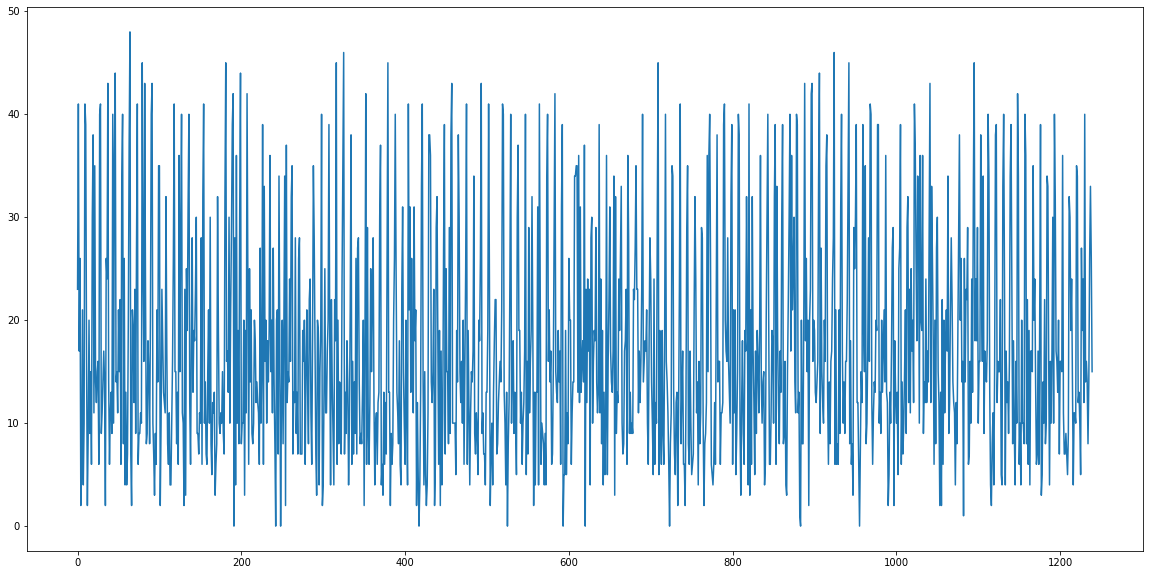

In [ ]:
data['number_clients'].plot(figsize=(20,10))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


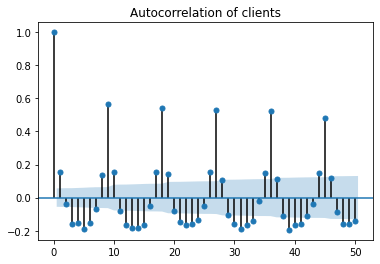

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['number_clients'],title ='Autocorrelation of clients',lags=50)
pyplot.show()

# do an ACF to identify the model 

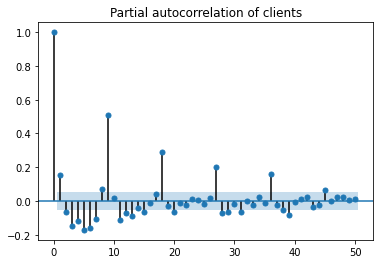

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['number_clients'],title="Partial autocorrelation of clients", lags=50)
pyplot.show()

# check the PACF to identify the type of time series 

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = data['number_clients'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.863123
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [ ]:
data_lagged = data.copy()
for i in range(1, 10):
   data_lagged['Number of clients lag' + str(i)] = data_lagged['number_clients'].shift(i)
  
data_lagged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dte                     826 non-null    object 
 1   number_clients          826 non-null    int64  
 2   Shift                   826 non-null    int64  
 3   day                     826 non-null    object 
 4   Before holiday          8 non-null      float64
 5   Unnamed: 6              1 non-null      object 
 6   Holiday                 8 non-null      object 
 7   Before Holiday          4 non-null      float64
 8   Number of clients lag1  825 non-null    float64
 9   Number of clients lag2  824 non-null    float64
 10  Number of clients lag3  823 non-null    float64
 11  Number of clients lag4  822 non-null    float64
 12  Number of clients lag5  821 non-null    float64
 13  Number of clients lag6  820 non-null    float64
 14  Number of clients lag7  819 non-null    fl

In [ ]:
cols = [0,2,3,4,5,6,7]
data_lagged=data_lagged.drop(data_lagged.columns[cols],axis=1)
data_lagged.info(verbose=True)

In [ ]:
data_lagged=data_lagged.drop(data_lagged.index[0:9])

data_lagged.head()

In [ ]:
import matplotlib.pyplot as plt

corr = data_lagged.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

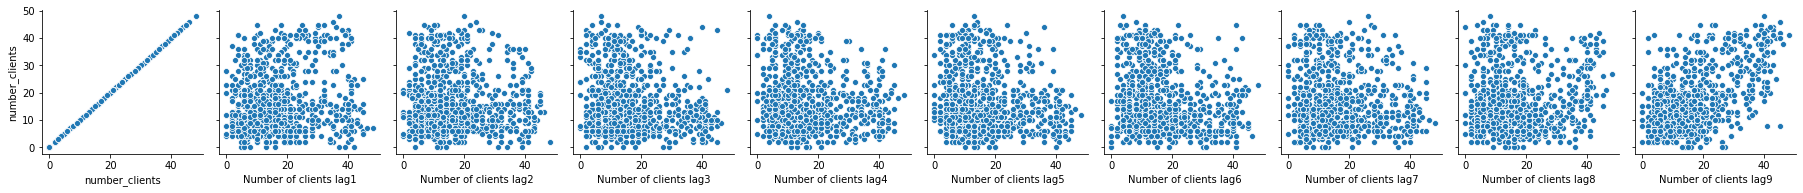

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(data_lagged, x_vars=data_lagged.columns, y_vars='number_clients')

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(data_lagged, hue="number_clients")

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams

col = ['Dte','number_clients']
data_decompose= data[col]
data_decompose = data_decompose.set_index('Dte')
data_decompose.info(verbose=True)
data_decompose.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2015-01-09 to 2017-12-23
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   number_clients  1240 non-null   int64
dtypes: int64(1)
memory usage: 19.4 KB


,number_clients
Dte,
2015-01-09,23
2015-01-10,41
2015-01-13,17
2015-01-13,26
2015-01-14,2


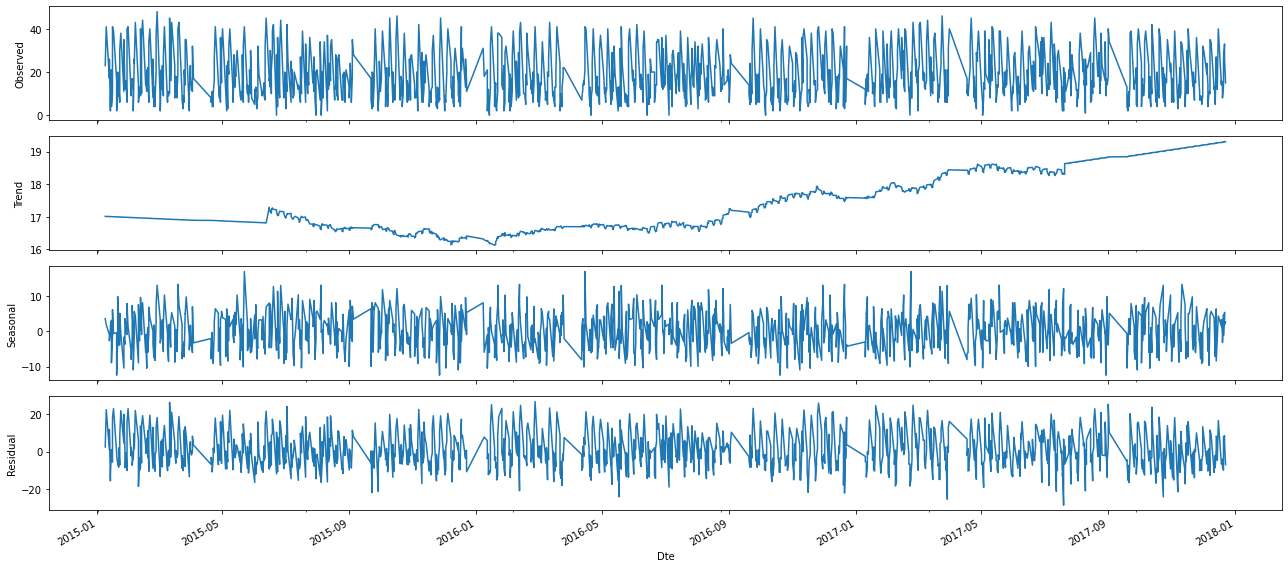

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data_decompose, model='additive',freq=365, extrapolate_trend = 365) # freq: périod = 9 --> bloc, pattern qui se répète 
fig = decomposition.plot()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


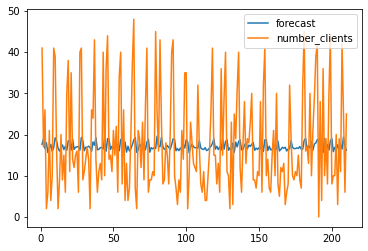

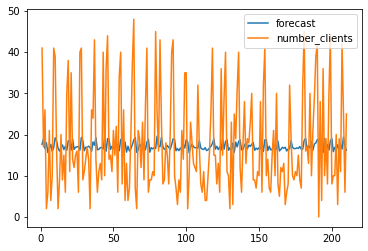

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(data["number_clients"], order=(1, 1))
results = model.fit()
results.plot_predict(1, 210)

In [ ]:
print(results.summary())

In [ ]:
from statsmodels.tsa.arima_model import ARMA

for i in range(6):
  for j in range(6):
    model= ARMA(data['number_clients'],order=(i,j))
    results = model.fit()
    print(results.summary())


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(data['number_clients'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

In [ ]:
pip install pyramid-arima 
from pyramid.arima import auto_arima

In [ ]:
stepwise_model = auto_arima(data['number_clients'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=9,
                           start_P=0, seasonal=True,
                           d=0, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 9); AIC=6111.438, BIC=6135.021, Fit time=1.688 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 9); AIC=6310.161, BIC=6319.594, Fit time=0.045 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 9); AIC=5976.685, BIC=5995.551, Fit time=1.425 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 9); AIC=6109.440, BIC=6128.307, Fit time=0.928 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 9); AIC=6299.769, BIC=6313.918, Fit time=0.086 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 9); AIC=5900.191, BIC=5923.774, Fit time=4.314 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 9); AIC=5815.089, BIC=5843.388, Fit time=10.679 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 1, 9); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 1, 9); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 1, 9); AIC=

LTSM neural network (https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

In [ ]:
import numpy as np
import pandas as pd
import math
from math import sqrt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data_lagged = data.copy()
for i in range(1, 10):
   data_lagged['Number of clients lag' + str(i)] = data_lagged['number_clients'].shift(i)
  
cols = [0,2,3,4,5,6,7]
data_lagged=data_lagged.drop(data_lagged.columns[cols],axis=1)
data_lagged.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_clients          1240 non-null   int64  
 1   Number of clients lag1  1239 non-null   float64
 2   Number of clients lag2  1238 non-null   float64
 3   Number of clients lag3  1237 non-null   float64
 4   Number of clients lag4  1236 non-null   float64
 5   Number of clients lag5  1235 non-null   float64
 6   Number of clients lag6  1234 non-null   float64
 7   Number of clients lag7  1233 non-null   float64
 8   Number of clients lag8  1232 non-null   float64
 9   Number of clients lag9  1231 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 97.0 KB


In [ ]:
data_LTSM = data_lagged.iloc[:,0:2]
data_LTSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_clients          1240 non-null   int64  
 1   Number of clients lag1  1239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 19.5 KB


In [ ]:
data_LTSM=data_LTSM.fillna(value=0)
data_LTSM.head()

,number_clients,Number of clients lag1
0,23,0.0
1,41,23.0
2,17,41.0
3,26,17.0
4,2,26.0


In [ ]:
X = data_LTSM.iloc[0:1140,1].values
Y = data_LTSM.iloc[1140:1240,0].values

In [ ]:
len(X)

1140

In [ ]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.1,
                                                    random_state=42) '''

In [ ]:
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the ending index
        end_index = i + n_steps
        # checking the length
        if end_index > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_index], sequence[end_index]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X.reshape(1,-1))

array([[ 0., 23., 41., ..., 14.,  9., 16.]])

In [ ]:
time_steps = 10 
X_train,y_train = split_sequence(X_scaled,time_steps)

array([], dtype=float64)